<a href="https://colab.research.google.com/github/tatsubo777/machine_learning_study/blob/main/%E7%AC%AC3%E7%AB%A0_%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AAscikit_learn%E3%81%AE%E6%B4%BB%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.2パーセプトロンの訓練**

In [ ]:
#p50
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#パラメータ作成
sc.fit(X_train)
#パラメータをデータに実装
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)
#誤分類のデータ点の個数を表示
print('Misclassfied examples: %d'% (y_test != y_pred).sum())
#正解率 = 1-[誤分類率] = 0.978

Misclassfied examples: 1


In [ ]:
from sklearn.metrics import accuracy_score
#分類の正解率を表示
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.978


"d" 符号付き 10 進整数

"i" 符号付き 10 進整数

"o" 符号付き 8 進数

"u" 旧式の型 -- 'd' と同じです

"x" 符号付き 16 進数 (小文字)

"X" 符号付き 16 進数 (大文字)

"e" 指数表記の浮動小数点数 (小文字)

"E" 指数表記の浮動小数点数 (大文字)

"f" 10 進浮動小数点数

"F" 10 進浮動小数点数
"g" 浮動小数点数。指数部が -4 以上または精度以下の場合には小文字指数表記、それ以外の場合には10進表記

"G" 浮動小数点数。指数部が -4 以上または精度以下の場合には大文字指数表記、それ以外の場合には10進表記

"c" 文字一文字 (整数または一文字からなる文字列を受理します)

"r" 文字列 (Python オブジェクトを repr() で変換します)

"s" 文字列 (Python オブジェクトを str() で変換します)

"a" 文字列 (Python オブジェクトを ascii() で変換します)

"%" 引数を変換せず、返される文字列中では文字 '%' になります

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#決定領域（図の直線）を引く関数
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
  #マーカーとカラーマップの準備
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  #決定領域プロット
  x1_min,x1_max = X[:,0].min() -1,X[:,0].max() + 1
  x2_min,x2_max = X[:,1].min() -1,X[:,0].max() + 1
  #グリッドポイントの作成
  xx1,xx2 =np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
  #各特徴量を１次元配列に変換して予測を実行
  Z = classifier.predict (np.array([xx1.ravel(),xx2.ravel()]).T)
  #予測結果を元のグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  #グリッドポイントの等高線のプロット
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  #軸の範囲を指定
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  #クラスごとのデータ点をプロット
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=colors[idx],
                marker=markers[idx],label=cl,edgecolor='black')
    
  #テストデータ点を目立たせる
  if test_idx:
    #全てのデータ点をプロット
    X_test,y_test = X[test_idx,:],y[test_idx]
    plt.scatter(X_test[:,0],X_test[:,1],c = '',edgecolor='black',
                alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


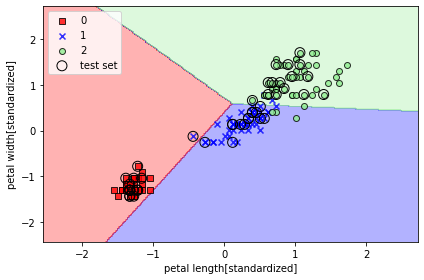

In [ ]:
#訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))
#決定領域のプロット
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,
                      test_idx=range(105,150))
#軸ラベルの設定
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
#凡例の指定
plt.legend(loc = 'upper left')
#グラフの表示
plt.tight_layout()
plt.show()

#パーセプトロンは完全に線形分離できないデータセットは収束しないので実務で推奨されない

**3.3ロジスティック回帰を使ってクラスの確率を予測するモデルの構築**

sigmoid関数のプロット

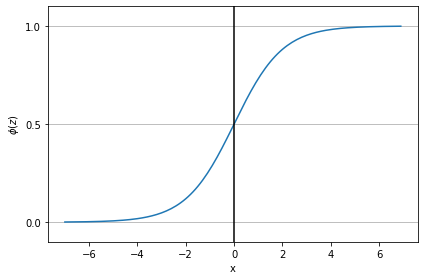

In [ ]:
#sigmoid関数のプロット
import matplotlib.pyplot as plt
import numpy as np
#シグモイド関数を定義
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-z))

#0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7,7,0.1)
#生成したデータでシグモイドを実行
phi_z = sigmoid(z)
#元のデータとシグモイド関数の出力のプロット
plt.plot(z,phi_z)
#垂直線を追加(x=0)
plt.axvline(0.0,color='k')
#y軸の上限/下限を設定
plt.ylim(-0.1,1.1)
#軸のラベルを設定
plt.xlabel('x')
plt.ylabel('$\phi (z)$')
#y軸のメモリを追加
plt.yticks([0.0,0.5,1.0])
#Axesクラスのオブジェクトの取得
ax = plt.gca()
#y軸のメモリに合わせて水平グリッド線を追加
ax.yaxis.grid(True)
#グラフを表示
plt.tight_layout()
plt.show()

**3.3.2ロジスティック関数の重みの学習**

(z)のさまざまな値に対する単一の訓練データの分類コストを具体的に示す

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


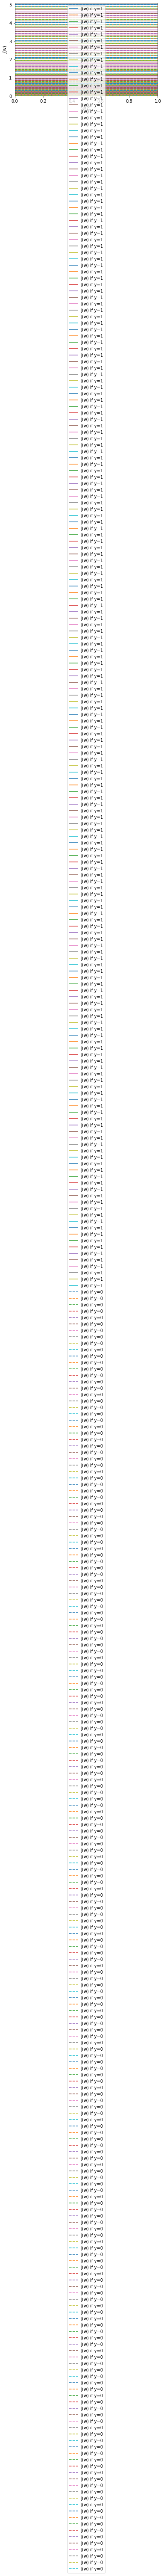

In [ ]:
#y=1のコストを計算する関数
def cost_1(z):
  return - np.log(sigmoid(z))

#y=0のコストの計算する関数
def cost_0(z):
  return -np.log(1 - sigmoid(z))

#0.1間隔で-10以上10未満のデータを生成
z = np.arange(-10,10,0.1)

#シグモイド関数を実行
phi_z = sigmoid(z)

#y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]

#結果をプロット
plt.plot(phi_z,c1,label='J(w) if y=1')
#y=0のコストを計算する関数を実行
c0 = [cost_0(x) for x in z]
#結果をプロット
plt.plot(phi_z,c0,linestyle = '--',label='J(w) if y=0')
#x軸とy軸の上限/下限を設定
plt.ylim(0.0,5.1)
plt.xlim([0,1])


#軸のラベルを設定
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
#凡例の設定
plt.legend(loc='upper center')
#グラフ表示
plt.tight_layout()
plt.show()

**3.3.3ADALINE実装をロジスティック回帰のアルゴリズムに変換**

In [ ]:
class LogisticRegressionGD(object):
  """ 勾配降下法に基づくロジスティック回帰分類器

      パラメータ
      ---------------
      eta: float
        学習率（0.0より大きく1.0以下の値）
      n_iter : int
        訓練データの訓練回数
      random_state :int
        重みを初期化するための乱数シード

        属性
        -------------
      w_ : 1次元配列
        適合後の重み
      cost_ : リスト
        各エポックでのロジスティックコスト関数
      """

  def __init__ (self,eta=0.05,n_iter=100,random_state=1):
        #学習率の初期化、訓練回数の初期化、乱数シードを固定にするrandom_state
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):

    


    
    """ 訓練データに適合させる

    パラメータ
    ------------
    X : (配列のような構造), shape = [n_examples,n_features]
        訓練データ
        n_exxamplesはデータ点の個数、n_featuresは特両々の個数
    y : 配列のようなデータ構造、shape = [n_examples]
        目的変数

      戻り値
      --------
       self : object
      """

        
    rgen = np.random.RandomState(self.random_state)  
    self.w_ = rgen.normal(loc = 0.0,scale=0.01,size=1+X.shape[1])
    self.cost_ = []
          #訓練回数分まで訓練データの反復処理
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y-output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      #誤差平方和のコストではなくロジスティック回帰のコストを計算することに注意
      cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
      #エポックごとのコストを格納
      self.cost_.append(cost)
    return self
        
  def net_input(self,X):
    """ 総入力を計算"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self,z):
    """ ロジスティックシグモイド活性化関数を計算 """
    return 1. /(1. + np.exp(-np.clip(z, -250,250)))

  def predict(self,X):
    """ 1ステップ後のクラスラベルを返す """
    return np.where(self.net_input(X) >= 0.0,1,0)
  #以下に等しい:
  # return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)

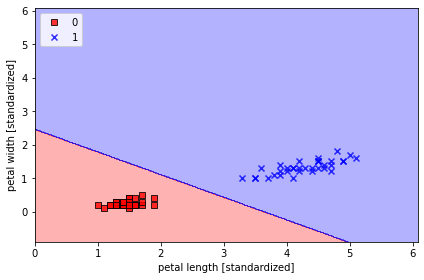

In [ ]:
 X_train_01_subset = X_train[(y_train == 0)| (y_train == 1)]
 y_train_01_subset = y_train[(y_train == 0)| (y_train == 1)]
 #ロジスティック回帰のインスタンスを生成
 lrgd = LogisticRegressionGD(eta = 0.05,n_iter=1000,random_state=1)
 #モデルを訓練データを適合させる
 lrgd.fit(X_train_01_subset,y_train_01_subset)
 #決定領域をプロット
 plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
 plt.xlabel('petal length [standardized]')
 plt.ylabel('petal width [standardized]')
 plt.legend(loc ='upper left')
 plt.tight_layout()
 plt.show()


**3.3.4 scikit-learnを使ったロジスティック回帰モデルの訓練**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


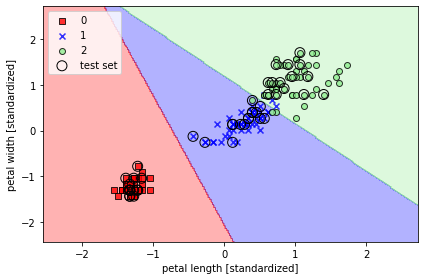

In [ ]:
from sklearn.linear_model import LogisticRegression
#ロジスティック回帰のインスタンスを作成
lr = LogisticRegression(C=100.0,random_state=1,solver='lbfgs',multi_class='ovr')#multi_class='multinomial'
#訓練データをモデルに適合させる
lr.fit(X_train_std,y_train)
#決定領域をプロット
plot_decision_regions(X_combined_std,y_combined,classifier=lr,
                      test_idx=range(105,150))
#軸ラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
#凡例を設定（左上に配置）
plt.legend(loc = 'upper left')
#グラフを表示
plt.tight_layout()
plt.show()

クラスの所属関係の確率

In [ ]:
lr.predict_proba(X_test_std[:3,:])
"""
array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01], 一つ目のデータ点に関するクラスの所属確率
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13], 二つ目のデータ点に関するクラスの所属確率
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])
       """

'\narray([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01], 一つ目のデータ点に関するクラスの所属確率\n       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13], 二つ目のデータ点に関するクラスの所属確率\n       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])\n       '

In [ ]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)#argmaxは各行で最も大きい列を特定する関数

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

単一のデータ点のクラスラベルを予測したい場合の注意点


scikit-learnは２次元配列を期待するため、２次元のデータ配列にする必要がある。

In [ ]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

**3.3.5正則化による過学習への対処**

バリアンスが高い→過学習

バイアスが高い→学習不足

両者はトレードオフの関係

正則化と特徴量の正規化

標準化など特徴量のスケーリングが重要とされるもう一つの理由として正則化がある。正則化を正常に機能させるには、全ての特徴量が比較可能な尺度になるようにする必要がある。
Cは逆正則化パラメータ

逆正則化パラメータの値を減らすことは正則化の強さを高めることを意味する
正則化の強さを可視化するには、２つの重み係数に対してL2正則化パスをプロットすれば良い

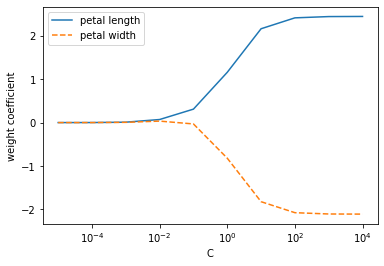

In [ ]:
#空のリストを生成（重み係数　逆正則化パラメータ）
weights,params = [],[]
#10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5,5):
  lr = LogisticRegression(C=10.**c,random_state=1,solver='lbfgs',multi_class='ovr')
  lr.fit(X_train_std,y_train)
  #重み係数を格納
  weights.append(lr.coef_[1])
  #逆正則化パラメータを格納
  params.append(10.**c)

#重み係数をnumpy配列に変換
weights = np.array(weights)
#横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
#縦軸を対数スケールに設定
plt.xscale('log')
plt.show()

**3.4 サポートベクトルマシンによる最大マージン分類**

サポートベクトルマシン→パーセプロンの拡張

SVMの最適化目的→マージンを最大化すること
マージンとは決定境界に最も近い訓練データの間の距離として定義される。
決定境界に最も近い訓練データはサポートベクトルと呼ばれる



**3.4.1最大マージンを直感的に理解する**

決定境界のマージンを大きくする理論的根拠は、汎化誤差が小さくなる傾向がある。

マージンの小さいモデルは過学習に陥りがちである。



**3.4.2 スラック変数を使った線形分離不可能なケースへの対処**


スラック変数は線形判別不可能なデータのために線形制約を緩和する必要があるときに使う。




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


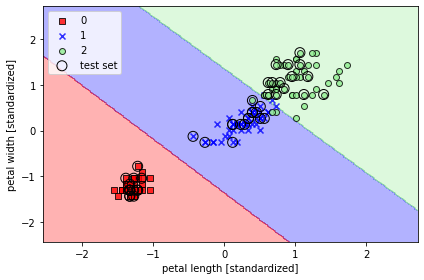

In [ ]:
from sklearn.svm import SVC
#線形SVMのインスタンスを作成
svm = SVC(kernel='linear',C=1.0,random_state=1)
#線形SVMのモデルに訓練データを結合させる
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**3.4.3 scikit-learnでの代替実装**




In [ ]:
from sklearn.linear_model import SGDClassifier
#確率的勾配降下法バージョンのパーセプロンを生成
ppn = SGDClassifier(loss='perception')
#確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')
#確率的勾配降下法バージョンのSVM（損失関数＝ヒンジ関数）を生成
svm = SGDClassifier(loss = 'hinge')

**3.5カーネルSVMを使った非線形問題の求解**

非線形分類の問題を解くためにカーネル化する。


**3.5.1 線形分離不可能なデータに対するカーネル手法**

Numpyのlogical_xor関数を使ってXORゲート形式の単純なデータセットを作成


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'beat'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


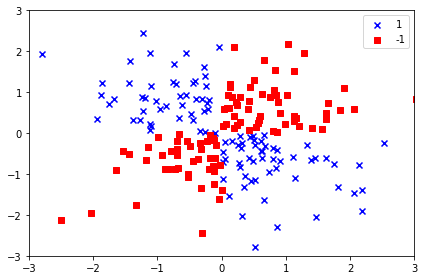

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#乱数シードを指定
np.random.seed(1)
#標準正規分布に従う乱数で200行２列の行列を生成
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,-1)
#ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
# ラベル-1を赤の四角のプロット
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
#軸の範囲を設定
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='beat')
plt.tight_layout()
plt.show()


**3.5.2 カーネルトリックを使って分離超平面を高次元空間で特定する。**

上記のデータは線形分離できないのでカーネル手法を使う。

２次元データを３次元データにする。

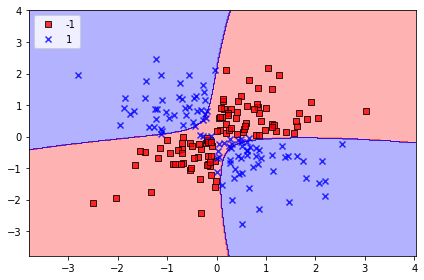

In [ ]:
# RBFカーネルによるSVMのインスタンスを作成
svm =SVC(kernel='rbf',random_state=1,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

(gamma=0.1)については、このカーネル関数（ガウスカーネル）の「カットオフ（限界値
条件）」パラメータであると解釈できる。パラメータの値を大きくすると、訓練データの影響力が大きくなり、到達範囲が広くなる。それにより、決定領域が狭くなり、突き出したようになる。ガンマパラメータを

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


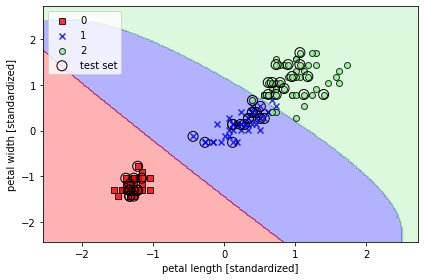

In [ ]:
#RBFカーネルによるSVMのインスタンスを作成（2つのパラメータ変更）
svm = SVC(kernel='rbf',random_state=1,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


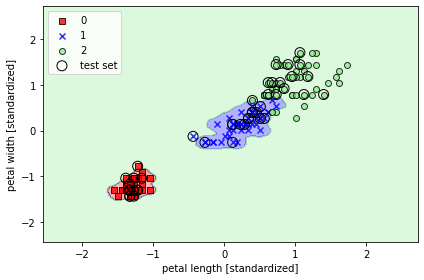

In [ ]:
#RBFカーネルによるSVMのインスタンスを生成（yパラメータを変更）
svm = SVC(kernel = 'rbf',random_state=1,gamma=100.0,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**3.6 決定技学習**
決定木は意味解釈性に配慮する場合に魅力的なモデル



**3.6.1 情報利得の最大化：できるだけ高い効果を得る**

情報利得は「親ノードの不純度」と「子ノードの不純度」の合計に過ぎない
つまり子ノードの不純度が低いほど、情報利得は大きくなる。

二分決定木でよく使われる不純度の指標や分割条件は、**ジニ不純度、エントロピー、分類誤差**の3つである。

エントロピー　＝　ノードの点が全て同じクラスに所属している場合はエントロピー０である。エントロピー が最大になるのは各クラスが一様に分布しているときである。
よって***エントロピーは相互情報量（2つの確率の相互依存度）が最大化するように試みる条件である。***

ジニ不純度　＝　誤分類の確率を最小化する条件

ジニ不純度とエントロピーはよく似た結果になるのが一般的

分類誤差　＝　決定木の深さを決めるのに役立つ。決定木を成長させるのに適していない。

**上記３種類の不純度条件を視覚化**

クラス１の確率範囲[0,1]に対する不純度の指標をプロット

ジニ不純度がエントロピーと分類誤差の中間に位置づけられていることを確認するために、エントロピーを２で割ったスケーリングバージョン（entropy/2)も追加する。




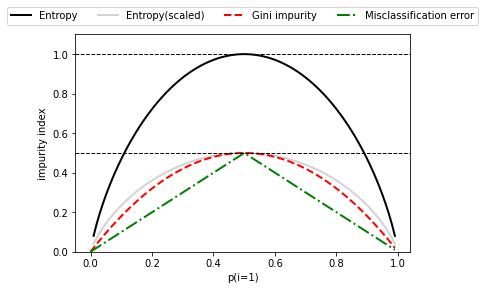

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#ジニ不純度の関数を定義
def gini(p):
  return (p)*(1-(p)) + (1-p)*(1-(1-p))

#エントロピー の関数を定義
def entropy(p):
  return - p*np.log2(p) - (1-p)*np.log2((1-p))

#分類誤差
def error(p):
  return 1 - np.max([p,1 - p])

#確率を表す配列を生成（０から0.99まで0.01刻み）
x = np.arange(0.0,1.0,0.01)
#配列の値をもとにエントロピー 、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
#図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
#エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i, lab, ls,c, in zip([ent,sc_ent,gini(x),err],['Entropy','Entropy(scaled)','Gini impurity','Misclassification error'],
                         ['-','-','--','-.'],
                         ['black','lightgray','red','green','cyan']):
  line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)

#凡例の設定（中央の上に配置）
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),
          ncol=5,fancybox=True,shadow=False)

#２本の水平の破線を引く
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
#横軸の上限/下限を設定
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

**3.6.2 決定木の構築**

不純度の条件としてジニ不純度を使って最大の深さが4の決定木を訓練する。

特徴量のスケーリングは、可視化が目的である場合は望ましいが、決定木アルゴリズムでは必須ではない（決定木は値の大小関係で条件分岐するので）

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


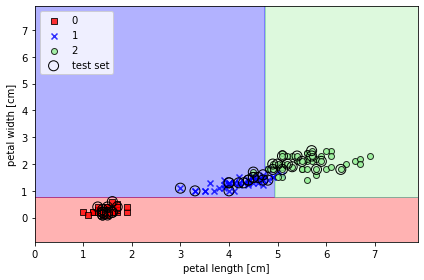

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#ジニ不純度を指標とする決定木のインスタンスを作成
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
#決定木のモデルを訓練データに適合させる
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#決定木特有の軸に並行な決定境界が得られる

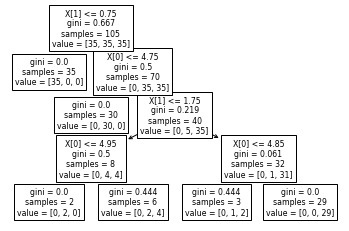

In [ ]:
from sklearn  import tree
tree.plot_tree(tree_model)
plt.show()

In [ ]:
pip install pydotplus

In [ ]:
pip install graphviz

In [ ]:
pip install pyparsing

決定木の画像をPNGフォーマットでローカルディレクトリで作成する。

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model,filled=True,rounded=True,
                           class_names=['Setosa','Versicolor','Virginica'],
                           feature_names=['petal length','petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_png')

True

**3.6.3 ランダムフォレストを使って複数の決定木を結合する**

ランダムフォレストは決定木のアンサンブル


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


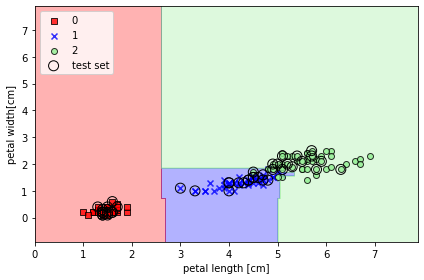

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',n_estimators=25,random_state=1,n_jobs=2)
#訓練データにランダムフォレストを適合させる
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**3.7k最近傍方法:怠惰学習アルゴリズム**

データ点がより近いものが優先される

標準化も重要

正則化は適用できない（決定木も）

特徴量選択と次元削減の手法を用いることで次元の呪いから逃れることができる


**まとめ**

線形問題と非線形問題に使われる様々な機械学習のアルゴリズムを紹介した。

意味解釈可能性に配慮する場合は、決定木が魅力的

SVMは強力な線形モデルであり、カーネルトリックを使って非線形問題の解を求めることが可能だが、予測を適切に行うために調整しなければならないパラメータが多い。

ランダムフォレストなどのアンサンブル法はパラメータ調整がそれほど必要なく、決定木ほど過学習に陥りやすくない。このため、実務上の多くの問題領域にとって魅力的なモデル

